
## Интерполяция функций


Пусть на отрезке $[a,b]$ задано упорядоченное множество точек 
$$
    x_0<x_1<\ldots<x_n
$$  
Пусть значения функции $f(x)$ известны только в этих точках:
$$
    y_i=f(x_i),\quad i=0,\ldots,n
$$

Необходимо найти приближенное значения функции $f(x)$ в точках 
$$
    x\neq x_{i}, \quad i=0,1,\ldots,n
$$

Если $x_0<x<x_n$, то это *задача интерполяции*, в противном случае - *задача экстраполяции*.

Задача интерполяции состоит в поиске такой функции $F(x)$ из заданного класса функций, что
$$ 
    F(x_{i})=y_{i},\quad i=0,\ldots ,n.
$$

* Точки $x_i$ называют **узлами интерполяции**, а их совокупность - **интерполяционной сеткой**.

* Пары $(x_i,y_i)$ называют **точками данных** или **базовыми точками**.

* Разность между «соседними» значениями $\Delta x_{i}=x_{i}-x_{i-1}$  — **шагом интерполяционной сетки**. Он может быть как переменным, так и постоянным.

* Функцию $F(x)$ — **интерполирующей функцией**.

Геометрический смысл интерполяции - провести кривую $F(x)$ на плоскости через заданные точки $(x_i, y_i)$.


### Полиномиальная интерполяция

Чаще всего $F(x)$ выбирается из класса полиномов и тогда 
интерполяция называется *полиномиальной*.

Полиномиальная интерполяция наиболее распространена, так как многочлены просты по форме, легко вычисляются, их легко дифференцировать и интегрировать.

#### 1. Интерполяция полином Вандермонда
В этом случае интерполирующую функцию $F(x)$ выбирают в виде полинома $P_n(x)$, $n$-й степени: 
$$
P_{n}(x)=c_{0}x^n+c_{1}x^{n-1}+\ldots+c_{n}
$$

В этой формуле $х$ это переменная, а $c_i$ - неизвестные, которые нужно найти из 
условий
$$ 
    F(x_{i})=y_{i},\quad i=0,\ldots ,n.
$$
в нашем случае принимают вид
$$
c_{0}x_0^n+c_{1}x_0^{n-1}+\ldots+c_{n} = y_0 \\
c_{0}x_1^n+c_{1}x_1^{n-1}+\ldots+c_{n} = y_1 \\
\dots \\
c_{0}x_n^n+c_{1}x_n^{n-1}+\ldots+c_{n} = y_n
$$

эта система $(n+1)$ линейных уравнений с $(n+1)$-ой неизвестной $c_i$

$$
A \cdot \vec{c} = \vec{y}
$$
где
$$
A = 
\begin{bmatrix}
  1& x_{0}& ...& x_{0}^{n}\\
  1& x_{1}& ...& x_{1}^{n}\\
  .& ...&  ... & ...      \\
  1& x_{n}& ...& x_{n}^{n}
\end{bmatrix}
\quad \mbox{матрица Вандермонда}
$$
$$
\vec{c}=
\begin{bmatrix}
  c_n\\
  c_{n-1}\\
  ...\\
  c_0
\end{bmatrix}
\quad \mbox{вектор неизвестных коэффициентов}
$$
$$
\vec{y}=
\begin{bmatrix}
  y_0\\
  y_1\\
  ...\\
  y_n
\end{bmatrix}
\quad \mbox{вектор правой части}
$$

Можно доказать, что определитель этой системы (определитель Вандермонда) не равен нулю:
$$
\begin{vmatrix}
  1& x_{0}& ...& x_{0}^{n}\\
  1& x_{1}& ...& x_{1}^{n}\\
  .& ...&  ... & ...      \\
  1& x_{n}& ...& x_{n}^{n}
\end{vmatrix} \ne 0
$$

Значит, задача интерполяции полиномами Вандермонда имеет единственное решение

$$
\vec{c} = A^{-1}\vec{y}
$$

##### ПРИМЕР
Построить интерполяцию Вандермонда для функции $f(x)=\sin(x)$ на отрезке $[0, 2\pi]$. Проанализировать решение с ростом степени полинома $n$.

**Решение**
Зададим степень интерполяционного полинома

In [23]:
n = 3

Построим равномерную интерполяционную сетку из $n+1$ узлов $x_i$ на заданном отрезке $[0, 2\pi]$

In [24]:
# импортируем модуль НумПай :) - набор питон функций для матричных вычислений
import numpy as np

a = 0
b = 2 * np.pi

x = np.linspace(a, b, n + 1)
print(x)

[ 0.          2.0943951   4.1887902   6.28318531]


Вычислим $y_i$ - значения функции $f(x)=\sin(x)$ в узлах $x_i$

In [25]:
y = np.sin(x)

print(y)

[  0.00000000e+00   8.66025404e-01  -8.66025404e-01  -2.44929360e-16]


Составим матрицу Вандермонда

In [29]:
# заполняем матрицу нулями
A = np.zeros((n + 1, n + 1))

# i меняется от 0 до n включительно первый цикл по строке
for i in range(n + 1):
    # j меняется от 0 до n включительно внутр. цикл по столбцу
    for j in range(n + 1):
        A[i, j] = x[i] ** j
        
# выводим нулевой столбец
print(A[:, 0])

[ 1.  1.  1.  1.]


Найдем обратную матрицу к матрице $A$

In [30]:
import numpy.linalg as linalg

B = linalg.inv(A)

# перемножаем А с обратной к ней В док-м един. матрицу
print(A.dot(B))

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -2.49800181e-16   1.00000000e+00   3.88578059e-16   1.38777878e-16]
 [ -6.66133815e-16   1.33226763e-15   1.00000000e+00   2.22044605e-16]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


Найдем решение $c_i$ системы Вандермонда

In [6]:
# матрицу обратную перемножаем с столбцом у
c = B.dot(y)

# выводим с справо налево
c = c[::-1]
c

array([ 0.09426594, -0.88843553,  1.86073502,  0.        ])

Зададим интерполирующий полином

In [7]:
# n+1  узлов xi на заданном отрезке [0,2π]

def P(x):
    y = 0
    
    # i меняется от 0 до n включительно
    for i in range(n + 1):
        y += c[i] * (x ** (n - i))
        
    return y

# вычисляем значения полинома в узлах сетки, должны получить значения исходной функции в узлах
print(P(x))

[ 0.         0.8660254 -0.8660254  0.       ]


Построим сетку и полученное решение

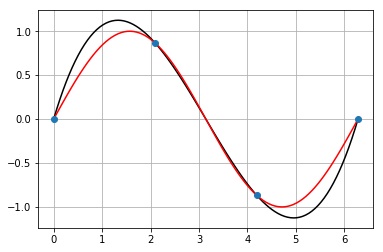

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

# 100 узлов сетки для построения гладкой кривой
xnew = np.linspace(a, b, 100)

# значения инт. полинома в узлах xnew
ynew = P(xnew)

# значения исх. функции в узлах xnew
yfun = np.sin(xnew)


plt.plot(xnew, ynew, '-k', xnew, yfun, '-r', x, y, 'o')

plt.grid(True)
plt.show()

#### Анализ погрешностей.

Вычислим разность между исх. функцией и инт. полиномом в узлах xnew. Эта разность называется абсолютной погрешностью.
$$
    d_i = y_i - P(x_i)
$$

In [9]:
d = yfun - ynew

Построим график абс. погрешности.

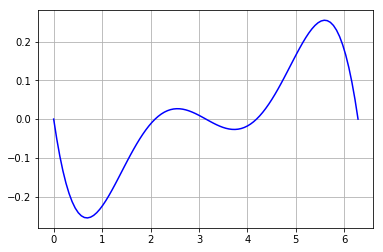

In [10]:
plt.plot(xnew, d, '-b')

plt.grid(True)
plt.show()

Вычислим **среднеквадратическую ошибку** интерполяции
$$
    MSE = \sqrt{\frac{1}{N}\sum_{i=1}^N (y_i - P(x_i))^2}
$$

In [11]:
MSE = np.sqrt(((yfun - ynew)**2).mean())
# ошибка 
print(MSE) 

0.13965860756


#### 2. Интерполяция полиномом Лагранжа

В этом случае интерполирующую функцию  $F(x)$ выбирают в виде полинома $P_n(x)$, $n$-й степени:

$$
P_n(x) = 
y_0\frac{(x-x_1)(x-x_2)\ldots(x-x_n)}{(x_0-x_1)(x_0-x_2)\ldots(x_0-x_n)} + 
y_1\frac{(x-x_0)(x-x_2)\ldots(x-x_n)}{(x_1-x_0)(x_1-x_2)\ldots(x_1-x_n)} + \ldots +
y_n\frac{(x-x_0)(x-x_1)\ldots(x-x_{n-1})}{(x_n-x_0)(x_n-x_1)\ldots(x_n-x_{n-1})}
$$

* $P_n(x)$ - полином n-ой степени.
* $P_n(x_i)=y_i$ - полином проходит через базовые точки.

##### ПРИМЕР
Построить интерполяцию Лагранжа для функции $f(x)=e^{-x^2}$ на отрезке $[-3, 3]$. Проанализировать решение с ростом степени полинома $n$.

**Решение**
Зададим степень интерполяционного полинома и границы интерполяционного отрезка $[a,b]$


In [12]:
n = 10
a = -3
b = 3

Построим равномерную интерполяционную сетку из $n+1$ узлов $x_i$ на заданном отрезке $[-3, 3]$

In [13]:
x = np.linspace(a, b, n + 1)
x

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

Вычислим $y_i$ - значения функции $f(x)=e^{-x^2}$ в узлах $x_i$

In [14]:
def f(x):
    return np.exp(-x**2)

y = f(x)
y

array([  1.23409804e-04,   3.15111160e-03,   3.91638951e-02,
         2.36927759e-01,   6.97676326e-01,   1.00000000e+00,
         6.97676326e-01,   2.36927759e-01,   3.91638951e-02,
         3.15111160e-03,   1.23409804e-04])

Определим функцию, вычисляющую отношение "скобок" в точке $x=t$

In [15]:
# i - номер слагаемого
def R(t, i):
    p1 = 1
    p2 = 1
    
    for j in range(n + 1):
        if j != i:
            p1 = p1 * (t - x[j])
            p2 = p2 * (x[i] - x[j])
    
    return p1 / p2

Определим функцию, вычисляющую полином Лагранжа в точке $x=t$

In [16]:
def L(t):
    z = 0   
    
    for i in range(n + 1):
        z = z + y[i] * R(t, i)
        
    return z

Построим сетку и полученное решение

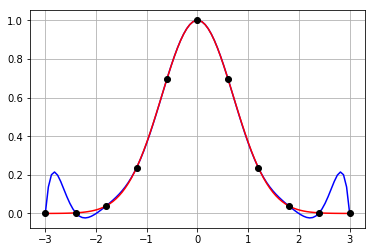

In [17]:
xnew = np.linspace(a, b, 100)
ynew = L(xnew)
yfun = f(xnew)

plt.plot(xnew, ynew, '-b', xnew, yfun, '-r', x, y, 'ok')
plt.grid(True)
plt.show()

#### Анализ погрешностей.

Вычислим разность между исх. функцией и инт. полиномом в узлах xnew. Эта разность называется абсолютной погрешностью.
$$
    d_i = y_i - L(x_i)
$$

In [18]:
d = yfun - ynew

Построим график абс. погрешности.

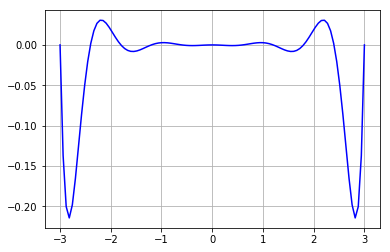

In [19]:
plt.plot(xnew, d, '-b')

plt.grid(True)
plt.show()

Вычислим **среднеквадратическую ошибку** интерполяции
$$
    MSE = \sqrt{\frac{1}{N}\sum_{i=1}^N (y_i - L(x_i))^2}
$$

In [20]:
MSE = np.sqrt(((yfun - ynew)**2).mean())
# ошибка в процентах
print(MSE) 

0.0635911338813
